In [1]:
import pybaseball as pb 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pybaseball import statcast
import glob
import pandas_profiling as pp
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr, LogisticRegressionCV as lrcv 

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
gbg = pb.retrosheet.season_game_logs(2008)

In [3]:
seasons = []
for x in range(2008,2020,1):
    seasons.append(x)

In [4]:
seasons.pop()

2019

In [5]:
seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [6]:
def season_pull(year):
    name = 'overall_'+str(year)
    '''Pull from retrosheet for season indicated by year 
    EX: season_pull(2008) returns a DataFrame containing 
    the entire game by game for the 2008 MLB Season'''
    df=pb.retrosheet.season_game_logs(year)
    df.to_csv('C:/Users/dakot/Documents/GitHub/baseball_predict/Data/'+name+'.csv' )
    return df

In [7]:
for x in seasons:
    season_pull(x)

In [9]:
df = pd.read_csv('C:/Users/dakot/Documents/GitHub/baseball_predict/Data/overall_2008.csv')
cols = []
for x in df.columns:
    cols.append(x)

In [10]:
cols.pop(0)

'Unnamed: 0'

In [11]:
path = 'baseball_predict/Data/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,usecols=cols,index_col=None)
    li.append(df)

frame = pd.concat(li, axis=0)

In [12]:
frame.shape

(26726, 161)

In [13]:
frame.head()

,date,game_num,day_of_week,visiting_team,visiting_team_league,visiting_game_num,home_team,home_team_league,home_team_game_num,visiting_score,home_score,num_outs,day_night,completion_info,forfeit_info,protest_info,park_id,attendance,time_of_game_minutes,visiting_line_score,home_line_score,visiting_abs,visiting_hits,visiting_doubles,visiting_triples,visiting_homeruns,visiting_rbi,visiting_sac_hits,visiting_sac_flies,visiting_hbp,visiting_bb,visiting_iw,visiting_k,visiting_sb,visiting_cs,visiting_gdp,visiting_ci,visiting_lob,visiting_pitchers_used,visiting_individual_er,visiting_er,visiting__wp,visiting_balks,visiting_po,visiting_assists,visiting_errors,visiting_pb,visiting_dp,visiting_tp,home_abs,home_hits,home_doubles,home_triples,home_homeruns,home_rbi,home_sac_hits,home_sac_flies,home_hbp,home_bb,home_iw,home_k,home_sb,home_cs,home_gdp,home_ci,home_lob,home_pitchers_used,home_individual_er,home_er,home_wp,home_balks,home_po,home_assists,home_errors,home_pb,home_dp,home_tp,ump_home_id,ump_home_name,ump_first_id,ump_first_name,ump_second_id,ump_second_name,ump_third_id,ump_third_name,ump_lf_id,ump_lf_name,ump_rf_id,ump_rf_name,visiting_manager_id,visiting_manager_name,home_manager_id,home_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,save_pitcher_id,save_pitcher_name,game_winning_rbi_id,game_winning_rbi_name,visiting_starting_pitcher_id,visiting_starting_pitcher_name,home_starting_pitcher_id,home_starting_pitcher_name,visiting_1_id,visiting_1_name,visiting_1_pos,visiting_2_id,visiting_2_name,visiting_2_pos,visiting_2_id.1,visiting_3_name,visiting_3_pos,visiting_4_id,visiting_4_name,visiting_4_pos,visiting_5_id,visiting_5_name,visiting_5_pos,visiting_6_id,visiting_6_name,visiting_6_pos,visiting_7_id,visiting_7_name,visiting_7_pos,visiting_8_id,visiting_8_name,visiting_8_pos,visiting_9_id,visiting_9_name,visiting_9_pos,home_1_id,home_1_name,home_1_pos,home_2_id,home_2_name,home_2_pos,home_3_id,home_3_name,home_3_pos,home_4_id,home_4_name,home_4_pos,home_5_id,home_5_name,home_5_pos,home_6_id,home_6_name,home_6_pos,home_7_id,home_7_name,home_7_pos,home_8_id,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,misc,acquisition_info
0,20080325,0,Tue,BOS,AL,1,OAK,AL,1,6,5,60,N,NaN,NaN,NaN,TOK01,44628.0,219,0000030012,2000020001,38,11,3,0,1,6,1,0,0,3,2,7,0,0,2,0,6,6,5,5,1,0,30,15,0,0,0,0,36,7,1,0,2,5,0,0,1,7,0,10,1,0,0,0,9,5,6,6,0,0,30,12,0,0,2,0,reedr901,Rick Reed,wendh902,Hunter Wendelstedt,timmt901,Tim Timmons,nauep901,Paul Nauert,NaN,(none),NaN,(none),frant001,Terry Francona,gereb001,Bob Geren,okajh001,Hideki Okajima,streh001,Huston Street,papej001,Jonathan Papelbon,ramim002,Manny Ramirez,matsd001,Daisuke Matsuzaka,blanj001,Joe Blanton,pedrd001,Dustin Pedroia,4,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,ramim002,Manny Ramirez,7,lowem001,Mike Lowell,5,mossb001,Brandon Moss,9,varij001,Jason Varitek,2,ellsj001,Jacoby Ellsbury,8,lugoj001,Julio Lugo,6,buckt001,Travis Buck,9,ellim001,Mark Ellis,4,bartd001,Daric Barton,3,custj001,Jack Cust,10,browe001,Emil Brown,7,crosb002,Bobby Crosby,6,hannj001,Jack Hannahan,5,suzuk001,Kurt Suzuki,2,sweer001,Ryan Sweeney,8,NaN,Y
1,20080326,0,Wed,BOS,AL,2,OAK,AL,2,1,5,51,N,NaN,NaN,NaN,TOK01,44735.0,171,000001000,01300001x,31,5,1,0,1,1,0,0,0,3,0,13,1,0,2,0,6,5,5,5,0,0,24,8,0,0,0,0,33,9,3,0,1,5,0,0,0,4,0,7,0,0,0,0,8,4,1,1,1,0,27,5,1,0,2,0,wendh902,Hunter Wendelstedt,timmt901,Tim Timmons,nauep901,Paul Nauert,reedr901,Rick Reed,NaN,(none),NaN,(none),frant001,Terry Francona,gereb001,Bob Geren,hardr001,Rich Harden,lestj001,Jon Lester,NaN,(none),denoc001,Chris Denorfia,lestj001,Jon Lester,hardr001,Rich Harden,pedrd001,Dustin Pedroia,4,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,ramim002,Manny Ramirez,7,lowem001,Mike Lowell,5,mossb001,Brandon Moss,9,varij001,Jason Varitek,2,crisc001,Coco Crisp,8,lugoj001,Julio Lugo,6,buckt001,Travis Buck,9,ellim001,Mark Ellis,4,bartd001,Daric Barton,3,sweem002,Mike Sweeney,10,browe001,Emil Brown,7,crosb002,Bobby Crosby

In [14]:
for x in frame:
    frame['win'] = np.where(frame['home_score']>frame['visiting_score'],frame['home_team'],frame['visiting_team'])

In [15]:
frame.win.describe()

count     26726
unique       31
top         NYA
freq       1010
Name: win, dtype: object

In [16]:
frame.head()

,date,game_num,day_of_week,visiting_team,visiting_team_league,visiting_game_num,home_team,home_team_league,home_team_game_num,visiting_score,home_score,num_outs,day_night,completion_info,forfeit_info,protest_info,park_id,attendance,time_of_game_minutes,visiting_line_score,home_line_score,visiting_abs,visiting_hits,visiting_doubles,visiting_triples,visiting_homeruns,visiting_rbi,visiting_sac_hits,visiting_sac_flies,visiting_hbp,visiting_bb,visiting_iw,visiting_k,visiting_sb,visiting_cs,visiting_gdp,visiting_ci,visiting_lob,visiting_pitchers_used,visiting_individual_er,visiting_er,visiting__wp,visiting_balks,visiting_po,visiting_assists,visiting_errors,visiting_pb,visiting_dp,visiting_tp,home_abs,home_hits,home_doubles,home_triples,home_homeruns,home_rbi,home_sac_hits,home_sac_flies,home_hbp,home_bb,home_iw,home_k,home_sb,home_cs,home_gdp,home_ci,home_lob,home_pitchers_used,home_individual_er,home_er,home_wp,home_balks,home_po,home_assists,home_errors,home_pb,home_dp,home_tp,ump_home_id,ump_home_name,ump_first_id,ump_first_name,ump_second_id,ump_second_name,ump_third_id,ump_third_name,ump_lf_id,ump_lf_name,ump_rf_id,ump_rf_name,visiting_manager_id,visiting_manager_name,home_manager_id,home_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,save_pitcher_id,save_pitcher_name,game_winning_rbi_id,game_winning_rbi_name,visiting_starting_pitcher_id,visiting_starting_pitcher_name,home_starting_pitcher_id,home_starting_pitcher_name,visiting_1_id,visiting_1_name,visiting_1_pos,visiting_2_id,visiting_2_name,visiting_2_pos,visiting_2_id.1,visiting_3_name,visiting_3_pos,visiting_4_id,visiting_4_name,visiting_4_pos,visiting_5_id,visiting_5_name,visiting_5_pos,visiting_6_id,visiting_6_name,visiting_6_pos,visiting_7_id,visiting_7_name,visiting_7_pos,visiting_8_id,visiting_8_name,visiting_8_pos,visiting_9_id,visiting_9_name,visiting_9_pos,home_1_id,home_1_name,home_1_pos,home_2_id,home_2_name,home_2_pos,home_3_id,home_3_name,home_3_pos,home_4_id,home_4_name,home_4_pos,home_5_id,home_5_name,home_5_pos,home_6_id,home_6_name,home_6_pos,home_7_id,home_7_name,home_7_pos,home_8_id,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,misc,acquisition_info,win
0,20080325,0,Tue,BOS,AL,1,OAK,AL,1,6,5,60,N,NaN,NaN,NaN,TOK01,44628.0,219,0000030012,2000020001,38,11,3,0,1,6,1,0,0,3,2,7,0,0,2,0,6,6,5,5,1,0,30,15,0,0,0,0,36,7,1,0,2,5,0,0,1,7,0,10,1,0,0,0,9,5,6,6,0,0,30,12,0,0,2,0,reedr901,Rick Reed,wendh902,Hunter Wendelstedt,timmt901,Tim Timmons,nauep901,Paul Nauert,NaN,(none),NaN,(none),frant001,Terry Francona,gereb001,Bob Geren,okajh001,Hideki Okajima,streh001,Huston Street,papej001,Jonathan Papelbon,ramim002,Manny Ramirez,matsd001,Daisuke Matsuzaka,blanj001,Joe Blanton,pedrd001,Dustin Pedroia,4,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,ramim002,Manny Ramirez,7,lowem001,Mike Lowell,5,mossb001,Brandon Moss,9,varij001,Jason Varitek,2,ellsj001,Jacoby Ellsbury,8,lugoj001,Julio Lugo,6,buckt001,Travis Buck,9,ellim001,Mark Ellis,4,bartd001,Daric Barton,3,custj001,Jack Cust,10,browe001,Emil Brown,7,crosb002,Bobby Crosby,6,hannj001,Jack Hannahan,5,suzuk001,Kurt Suzuki,2,sweer001,Ryan Sweeney,8,NaN,Y,BOS
1,20080326,0,Wed,BOS,AL,2,OAK,AL,2,1,5,51,N,NaN,NaN,NaN,TOK01,44735.0,171,000001000,01300001x,31,5,1,0,1,1,0,0,0,3,0,13,1,0,2,0,6,5,5,5,0,0,24,8,0,0,0,0,33,9,3,0,1,5,0,0,0,4,0,7,0,0,0,0,8,4,1,1,1,0,27,5,1,0,2,0,wendh902,Hunter Wendelstedt,timmt901,Tim Timmons,nauep901,Paul Nauert,reedr901,Rick Reed,NaN,(none),NaN,(none),frant001,Terry Francona,gereb001,Bob Geren,hardr001,Rich Harden,lestj001,Jon Lester,NaN,(none),denoc001,Chris Denorfia,lestj001,Jon Lester,hardr001,Rich Harden,pedrd001,Dustin Pedroia,4,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,ramim002,Manny Ramirez,7,lowem001,Mike Lowell,5,mossb001,Brandon Moss,9,varij001,Jason Varitek,2,crisc001,Coco Crisp,8,lugoj001,Julio Lugo,6,buckt001,Travis Buck,9,ellim001,Mark Ellis,4,bartd001,Daric Barton,3,sweem002,Mike Sweeney,10,browe001,Emil Brown,7,crosb002,Bobb

In [88]:
for x in frame.columns:
    print(x)

date
game_num
day_of_week
visiting_team
visiting_team_league
visiting_game_num
home_team
home_team_league
home_team_game_num
visiting_score
home_score
num_outs
day_night
completion_info
forfeit_info
protest_info
park_id
attendance
time_of_game_minutes
visiting_line_score
home_line_score
visiting_abs
visiting_hits
visiting_doubles
visiting_triples
visiting_homeruns
visiting_rbi
visiting_sac_hits
visiting_sac_flies
visiting_hbp
visiting_bb
visiting_iw
visiting_k
visiting_sb
visiting_cs
visiting_gdp
visiting_ci
visiting_lob
visiting_pitchers_used
visiting_individual_er
visiting_er
visiting__wp
visiting_balks
visiting_po
visiting_assists
visiting_errors
visiting_pb
visiting_dp
visiting_tp
home_abs
home_hits
home_doubles
home_triples
home_homeruns
home_rbi
home_sac_hits
home_sac_flies
home_hbp
home_bb
home_iw
home_k
home_sb
home_cs
home_gdp
home_ci
home_lob
home_pitchers_used
home_individual_er
home_er
home_wp
home_balks
home_po
home_assists
home_errors
home_pb
home_dp
home_tp
ump_home_id
u

In [17]:
#isolate all columns with future information, these details wouldnt be known until the conclusion of the game 
drops = ['visiting_score',
'home_score',
'num_outs',
'completion_info',
'forfeit_info',
'protest_info',
'attendance',
'time_of_game_minutes',
'visiting_line_score',
'home_line_score',
'visiting_abs',
'visiting_hits',
'visiting_doubles',
'visiting_triples',
'visiting_homeruns',
'visiting_rbi',
'visiting_sac_hits',
'visiting_sac_flies',
'visiting_hbp',
'visiting_bb',
'visiting_iw',
'visiting_k',
'visiting_sb',
'visiting_cs',
'visiting_gdp',
'visiting_ci',
'visiting_lob',
'visiting_pitchers_used',
'visiting_individual_er',
'visiting_er',
'visiting__wp',
'visiting_balks',
'visiting_po',
'visiting_assists',
'visiting_errors',
'visiting_pb',
'visiting_dp',
'visiting_tp',
'home_abs',
'home_hits',
'home_doubles',
'home_triples',
'home_homeruns',
'home_rbi',
'home_sac_hits',
'home_sac_flies',
'home_hbp',
'home_bb',
'home_iw',
'home_k',
'home_sb',
'home_cs',
'home_gdp',
'home_ci',
'home_lob',
'home_pitchers_used',
'home_individual_er',
'home_er',
'home_wp',
'home_balks',
'home_po',
'home_assists',
'home_errors',
'home_pb',
'home_dp',
'home_tp',
'winning_pitcher_id',
'winning_pitcher_name',
'losing_pitcher_id',
'losing_pitcher_name',
'save_pitcher_id',
'save_pitcher_name',
'game_winning_rbi_id',
'game_winning_rbi_name',
'misc',
'acquisition_info',
'visiting_manager_id',
'home_manager_id',
'visiting_starting_pitcher_id',
'home_starting_pitcher_id',
'visiting_1_id',
'visiting_2_id',
'visiting_2_id.1',
'visiting_4_id',
'visiting_5_id',
'visiting_6_id',
'visiting_7_id',
'visiting_8_id',
'visiting_9_id',
'home_1_id',
'home_2_id',
'home_3_id',
'home_4_id',
'home_5_id',
'home_6_id',
'home_7_id',
'home_8_id',
'home_9_id',
'ump_home_id',
'ump_home_name',
'ump_first_id',
'ump_first_name',
'ump_second_id',
'ump_second_name',
'ump_third_id',
'ump_third_name' ,
'ump_lf_id',
'ump_lf_name',
'ump_rf_id',
'ump_rf_name']

In [18]:
kill_time_trvl = frame.drop(drops, axis=1)

In [19]:
kill_time_trvl.head()

,date,game_num,day_of_week,visiting_team,visiting_team_league,visiting_game_num,home_team,home_team_league,home_team_game_num,day_night,park_id,visiting_manager_name,home_manager_name,visiting_starting_pitcher_name,home_starting_pitcher_name,visiting_1_name,visiting_1_pos,visiting_2_name,visiting_2_pos,visiting_3_name,visiting_3_pos,visiting_4_name,visiting_4_pos,visiting_5_name,visiting_5_pos,visiting_6_name,visiting_6_pos,visiting_7_name,visiting_7_pos,visiting_8_name,visiting_8_pos,visiting_9_name,visiting_9_pos,home_1_name,home_1_pos,home_2_name,home_2_pos,home_3_name,home_3_pos,home_4_name,home_4_pos,home_5_name,home_5_pos,home_6_name,home_6_pos,home_7_name,home_7_pos,home_8_name,home_8_pos,home_9_name,home_9_pos,win
0,20080325,0,Tue,BOS,AL,1,OAK,AL,1,N,TOK01,Terry Francona,Bob Geren,Daisuke Matsuzaka,Joe Blanton,Dustin Pedroia,4,Kevin Youkilis,3,David Ortiz,10,Manny Ramirez,7,Mike Lowell,5,Brandon Moss,9,Jason Varitek,2,Jacoby Ellsbury,8,Julio Lugo,6,Travis Buck,9,Mark Ellis,4,Daric Barton,3,Jack Cust,10,Emil Brown,7,Bobby Crosby,6,Jack Hannahan,5,Kurt Suzuki,2,Ryan Sweeney,8,BOS
1,20080326,0,Wed,BOS,AL,2,OAK,AL,2,N,TOK01,Terry Francona,Bob Geren,Jon Lester,Rich Harden,Dustin Pedroia,4,Kevin Youkilis,3,David Ortiz,10,Manny Ramirez,7,Mike Lowell,5,Brandon Moss,9,Jason Varitek,2,Coco Crisp,8,Julio Lugo,6,Travis Buck,9,Mark Ellis,4,Daric Barton,3,Mike Sweeney,10,Emil Brown,7,Bobby Crosby,6,Jack Hannahan,5,Kurt Suzuki,2,Chris Denorfia,8,OAK
2,20080330,0,Sun,ATL,NL,1,WAS,NL,1,N,WAS11,Bobby Cox,Manny Acta,Tim Hudson,Odalis Perez,Kelly Johnson,4,Yunel Escobar,6,Chipper Jones,5,Mark Teixeira,3,Jeff Francoeur,9,Brian McCann,2,Matt Diaz,7,Mark Kotsay,8,Tim Hudson,1,Cristian Guzman,6,Lastings Milledge,8,Ryan Zimmerman,5,Nick Johnson,3,Austin Kearns,9,Paul Lo Duca,2,Elijah Dukes,7,Ronnie Belliard,4,Odalis Perez,1,WAS
3,20080331,0,Mon,PIT,NL,1,ATL,NL,2,N,ATL02,John Russell,Bobby Cox,Ian Snell,Tom Glavine,Nate McLouth,8,Freddy Sanchez,4,Jason Bay,7,Adam LaRoche,3,Xavier Nady,9,Ryan Doumit,2,Jose Bautista,5,Jack Wilson,6,Ian Snell,1,Kelly Johnson,4,Yunel Escobar,6,Chipper Jones,5,Mark Teixeira,3,Brian McCann,2,Jeff Francoeur,9,Mark Kotsay,8,Matt Diaz,7,Tom Glavine,1,PIT
4,20080331,0,Mon,MIL,NL,1,CHN,NL,1,D,CHI11,Ned Yost,Lou Piniella,Ben Sheets,Carlos Zambrano,Rickie Weeks,4,Tony Gwynn,8,Prince Fielder,3,Ryan Braun,7,Bill Hall,5,Corey Hart,9,J.J. Hardy,6,Ben Sheets,1,Jason Kendall,2,Ryan Theriot,6,Alfonso Soriano,7,Derrek Lee,3,Aramis Ramirez,5,Kosuke Fukudome,9,Mark DeRosa,4,Geovany Soto,2,Felix Pie,8,Carlos Zambrano,1,MIL


In [20]:
kill_time_trvl.describe(include='object')

,day_of_week,visiting_team,visiting_team_league,home_team,home_team_league,day_night,park_id,visiting_manager_name,home_manager_name,visiting_starting_pitcher_name,home_starting_pitcher_name,visiting_1_name,visiting_2_name,visiting_3_name,visiting_4_name,visiting_5_name,visiting_6_name,visiting_7_name,visiting_8_name,visiting_9_name,home_1_name,home_2_name,home_3_name,home_4_name,home_5_name,home_6_name,home_7_name,home_8_name,home_9_name,win
count,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726,26726
unique,7,31,2,31,2,2,42,97,99,961,953,612,881,596,598,921,1167,1334,1488,1790,602,891,581,588,896,1155,1328,1430,1381,31
top,Sat,COL,NL,TEX,NL,N,MIL06,Joe Maddon,Joe Maddon,Justin Verlander,James Shields,Denard Span,Dustin Pedroia,Joey Votto,Adrian Beltre,Jay Bruce,Yadier Molina,Mark Reynolds,Jeff Mathis,Cliff Pennington,Denard Span,Dustin Pedroia,Ryan Braun,Adrian Beltre,Jay Bruce,Yadier Molina,J.J. Hardy,Jordy Mercer,Brendan Ryan,NYA
freq,4337,892,13766,892,13766,17947,896,892,892,179,182,585,408,639,523,319,235,154,213,196,572,416,622,522,299,256,157,225,200,1010


In [21]:
kill_time_trvl.isna().sum()

date                              0
game_num                          0
day_of_week                       0
visiting_team                     0
visiting_team_league              0
visiting_game_num                 0
home_team                         0
home_team_league                  0
home_team_game_num                0
day_night                         0
park_id                           0
visiting_manager_name             0
home_manager_name                 0
visiting_starting_pitcher_name    0
home_starting_pitcher_name        0
visiting_1_name                   0
visiting_1_pos                    0
visiting_2_name                   0
visiting_2_pos                    0
visiting_3_name                   0
visiting_3_pos                    0
visiting_4_name                   0
visiting_4_pos                    0
visiting_5_name                   0
visiting_5_pos                    0
visiting_6_name                   0
visiting_6_pos                    0
visiting_7_name             

In [130]:
umps=['ump_home_id',
'ump_home_name',
'ump_first_id',
'ump_first_name',
'ump_second_id',
'ump_second_name',
'ump_third_id',
'ump_third_name' ,
'ump_lf_id',
'ump_lf_name',
'ump_rf_id',
'ump_rf_name']

In [131]:
kill_time_trvl.drop(umps, axis=1, inplace=True)

In [22]:
y = kill_time_trvl['win']
X = kill_time_trvl.drop(columns='win', axis = 1)

In [23]:
y.shape


(26726,)

In [148]:
# Need to encode X to model logistic, multiclass 
# Look into wrapping multiple paired team models in a single function 
# Deploy the thing!

In [192]:
X.shape

(26726, 73)

In [24]:
# use Binary encoding to take care of categoricals and labels without adding too much dimensionality 
import category_encoders as ce 

In [25]:
# Categorical boolean mask
cat_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols = X.columns[cat_mask].tolist()

In [26]:
ids = ['visiting_manager_id',
'home_manager_id',
'visiting_starting_pitcher_id',
'home_starting_pitcher_id',
'visiting_1_id',
'visiting_2_id',
'visiting_2_id.1',
'visiting_4_id',
'visiting_5_id',
'visiting_6_id',
'visiting_7_id',
'visiting_8_id',
'visiting_9_id',
'home_1_id',
'home_2_id',
'home_3_id',
'home_4_id',
'home_5_id',
'home_6_id',
'home_7_id',
'home_8_id',
'home_9_id']

In [27]:
for x in cat_cols:
    for i in ids:
        if x==i:
            cat_cols.remove(x)

In [28]:
cat_cols


['day_of_week',
 'visiting_team',
 'visiting_team_league',
 'home_team',
 'home_team_league',
 'day_night',
 'park_id',
 'visiting_manager_name',
 'home_manager_name',
 'visiting_starting_pitcher_name',
 'home_starting_pitcher_name',
 'visiting_1_name',
 'visiting_2_name',
 'visiting_3_name',
 'visiting_4_name',
 'visiting_5_name',
 'visiting_6_name',
 'visiting_7_name',
 'visiting_8_name',
 'visiting_9_name',
 'home_1_name',
 'home_2_name',
 'home_3_name',
 'home_4_name',
 'home_5_name',
 'home_6_name',
 'home_7_name',
 'home_8_name',
 'home_9_name']

In [29]:
encoder = ce.BinaryEncoder(cols=cat_cols)
X_cat_enc = encoder.fit_transform(X)

In [30]:
X_cat_enc.shape #soooo many columns, but we shall workwith it for now

(26726, 295)

In [32]:
# X_cat_enc.drop(ids,axis=1,inplace=True)

In [33]:
X_cat_enc.shape, y.shape

((26726, 295), (26726,))

In [34]:
X_train, X_test, y_train, y_test = tts(X_cat_enc,y,test_size=0.2, random_state=42 )

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21380, 295), (5346, 295), (21380,), (5346,))

In [95]:
X_train.columns

Index(['date', 'game_num', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'visiting_team_0', 'visiting_team_1', 'visiting_team_2', 'visiting_team_3',
       ...
       'home_9_name_3', 'home_9_name_4', 'home_9_name_5', 'home_9_name_6', 'home_9_name_7', 'home_9_name_8', 'home_9_name_9', 'home_9_name_10', 'home_9_name_11', 'home_9_pos'], dtype='object', length=295)

In [36]:
l_model = lr(multi_class='multinomial',solver='newton-cg', max_iter=300)
l_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = l_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score as score 

In [39]:
acc = score(y_test,y_pred)

In [40]:
acc

0.4992517770295548

In [43]:
l_model.coef_

array([[-7.87378275e-07, -1.67937828e-02,  0.00000000e+00, ...,
         4.95923749e-02, -2.12641748e-01,  1.02116332e-01],
       [ 7.46101049e-07,  1.92027898e-01,  0.00000000e+00, ...,
         1.63342029e-01, -7.26553581e-02, -1.26889805e-01],
       [ 5.29462865e-07,  3.45110062e-01,  0.00000000e+00, ...,
        -3.06441324e-01,  2.17996926e-01, -1.35657071e-01],
       ...,
       [-6.43272468e-07, -7.98152749e-02,  0.00000000e+00, ...,
         2.41744830e-01, -8.51100720e-02,  8.07243151e-02],
       [-5.36137674e-07,  1.70988820e-01,  0.00000000e+00, ...,
         1.49990534e-01, -3.86777954e-01,  1.25384447e-01],
       [ 6.52446823e-07,  4.87144423e-02,  0.00000000e+00, ...,
         4.50051419e-02,  2.72554976e-01, -1.16961882e-01]])

In [45]:
print(list(zip(l_model.coef_[0,:], X.columns)))

[(-7.873782750576276e-07, 'date'), (-0.016793782772020163, 'game_num'), (0.0, 'day_of_week'), (0.0010000731036743015, 'visiting_team'), (0.021116627068496364, 'visiting_team_league'), (0.022387566093896246, 'visiting_game_num'), (0.0, 'home_team'), (-1.1105270257132802, 'home_team_league'), (0.19256859559450365, 'home_team_game_num'), (0.48963327901891, 'day_night'), (-0.40567653997442493, 'park_id'), (1.005625602542449, 'visiting_manager_name'), (-0.7435245808303964, 'home_manager_name'), (0.7437284791695544, 'visiting_starting_pitcher_name'), (0.03159561565577436, 'home_starting_pitcher_name'), (0.0, 'visiting_1_name'), (0.646211332652968, 'visiting_1_pos'), (-0.5494425147313549, 'visiting_2_name'), (-0.7379408694053015, 'visiting_2_pos'), (1.099124272761821, 'visiting_3_name'), (0.6426092424757797, 'visiting_3_pos'), (-0.1462290645929491, 'visiting_4_name'), (0.14643296293210686, 'visiting_4_pos'), (-0.02868266369632604, 'visiting_5_name'), (0.06739059108730293, 'visiting_5_pos'), (

In [46]:
coef_dict = {}
for coef, feat in zip(l_model.coef_[0,:],X.columns):
    coef_dict[feat] = coef

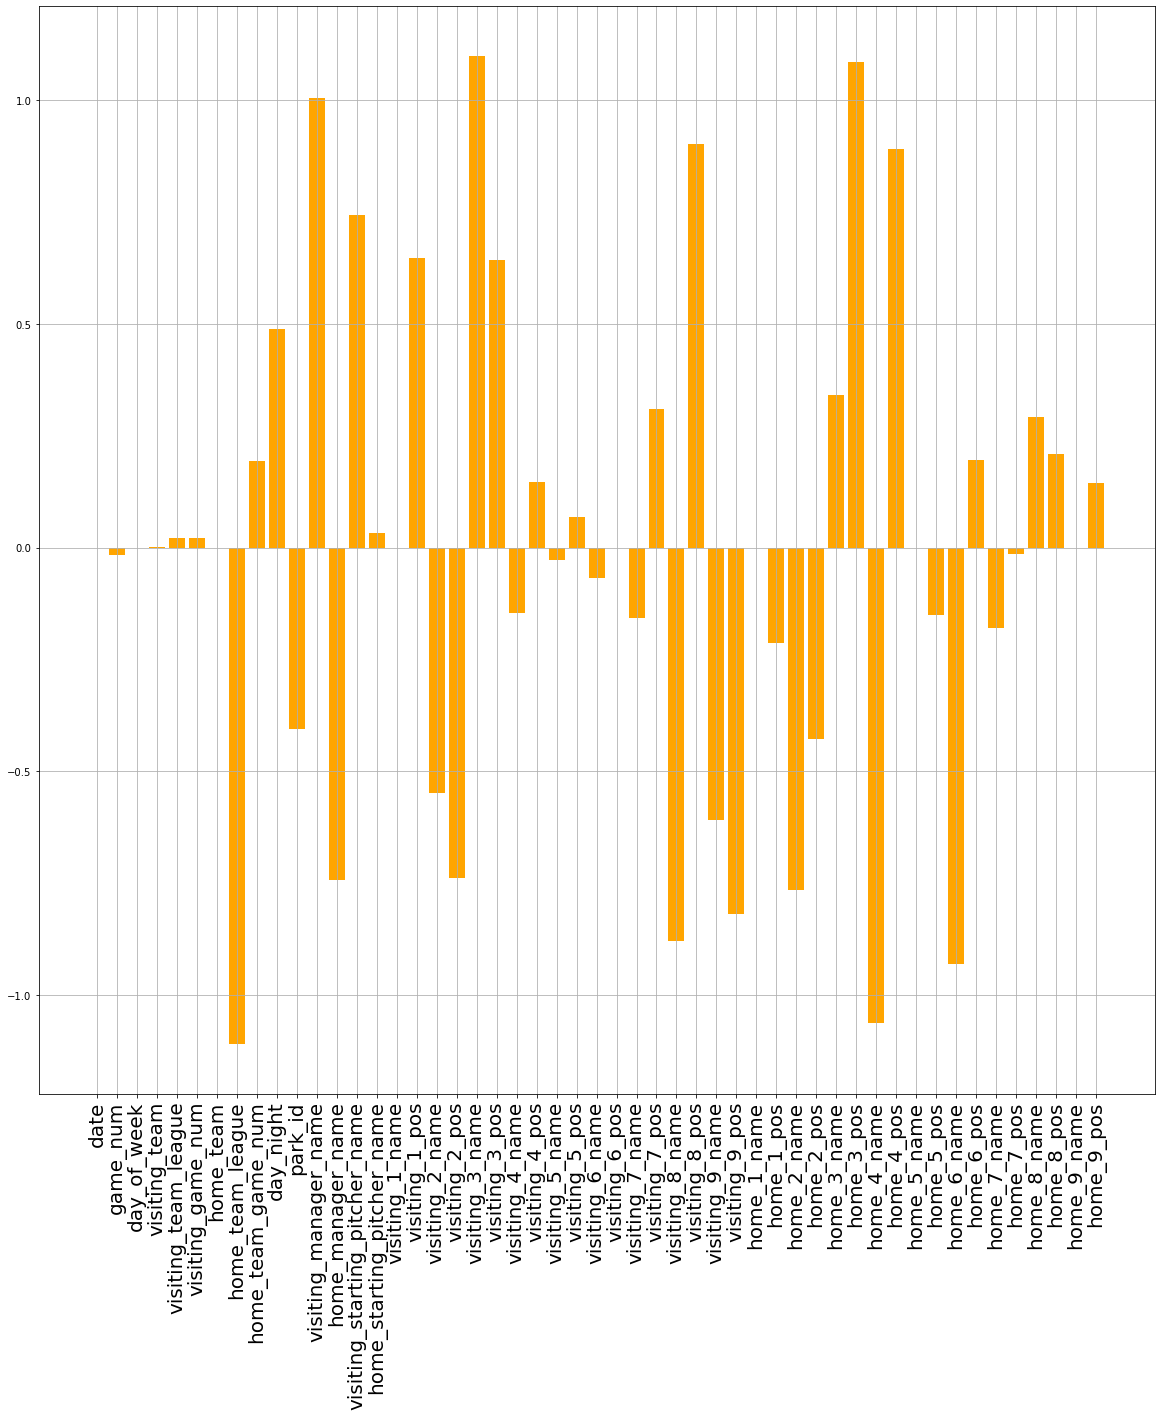

In [93]:
plt.figure(figsize=(20,20))

plt.bar(*zip(*coef_dict.items()),color='orange')
plt.xticks( X.columns, rotation='vertical', fontsize='20')
plt.grid();
plt.savefig('feature_coefs.png',bbox_inches='tight')